In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pickle
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from pandas_profiling import ProfileReport as pr

In [55]:
df = pd.read_csv("Train.csv")
df

Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0            0.407       0.00380           2      -35.865           1   
1            0.234       0.10500           0      -19.884           1   
2            0.668       0.72600           9       -7.512           1   
3            0.184       0.00561           4      -34.357           1   
4            0.231       0.13100           6      -22.842           1   
...            ...           ...         ...          ...         ...   
18203        0.403       0.28100           6      -10.365           0   
18204        0.481       0.01140           4      -26.196           1   
18205        0.168       0.00908           5      -33.966           0   
18206        0.598       0.65800           1       -7.159           0   
18207        0.582       0.32400           2      -10.284           1   

       Store_Presence   Score_1  Score_2  Score_3  Score_4    time  popularity  
0              0.9920  0.944000   0.0988   0.1100  113.911  189125           4  
1              0.9440  0.900000   0.1290   0.0382   76.332  186513           4  
2              0.0387  0.000000   0.1340   0.4530  124.075  172143           4  
3              0.8490  0.931000   0.1110   0.0641   79.037  184000           5  
4              0.9370  0.000000   0.1090   0.0677  109.560  186507           3  
...               ...       ...      ...      ...      ...     ...         ...  
18203          0.4540  0.000000   0.1060   0.1820  112.881  232880           4  
18204          0.9910  0.967000   0.0985   0.3430   57.748  155500           4  
18205          0.9470  0.946000   0.1250   0.3960   68.775  172500           4  
18206          0.3890  0.000000   0.5820   0.4730  106.807  152558           4  
18207          0.8070  0.000034   0.1500   0.2490   88.755  237293           3  

[18208 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     18208 non-null  float64
 1   Basket_Ratio    18208 non-null  float64
 2   Category_1      18208 non-null  int64  
 3   Store_Score     18208 non-null  float64
 4   Category_2      18208 non-null  int64  
 5   Store_Presence  18208 non-null  float64
 6   Score_1         18208 non-null  float64
 7   Score_2         18208 non-null  float64
 8   Score_3         18208 non-null  float64
 9   Score_4         18208 non-null  float64
 10  time            18208 non-null  int64  
 11  popularity      18208 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [4]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

Store_Ratio       0.0
Basket_Ratio      0.0
Category_1        0.0
Store_Score       0.0
Category_2        0.0
Store_Presence    0.0
Score_1           0.0
Score_2           0.0
Score_3           0.0
Score_4           0.0
time              0.0
popularity        0.0
dtype: float64

In [5]:
tt = pd.read_csv("test.csv")
tt.head()

Store_Ratio  Basket_Ratio  Category_1  Store_Score  Category_2  \
0        0.164         0.994           1      -23.718           0   
1        0.586         0.636           4       -7.710           1   
2        0.457         0.743           0       -7.591           1   
3        0.423         0.748           5       -9.832           1   
4        0.802         0.756           2      -10.791           0   

   Store_Presence  Score_1  Score_2  Score_3  Score_4    time  
0         0.12400  0.99100   0.7890  0.00001  127.602  236436  
1         0.00208  0.32200   0.1070  0.35500  136.337  253631  
2         0.40400  0.00931   0.2010  0.68800  154.902  215669  
3         0.03000  0.22100   0.1690  0.42800   93.977  325200  
4         0.08430  0.00765   0.0521  0.96300  131.715  288293

In [6]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Store_Ratio     12140 non-null  float64
 1   Basket_Ratio    12140 non-null  float64
 2   Category_1      12140 non-null  int64  
 3   Store_Score     12140 non-null  float64
 4   Category_2      12140 non-null  int64  
 5   Store_Presence  12140 non-null  float64
 6   Score_1         12140 non-null  float64
 7   Score_2         12140 non-null  float64
 8   Score_3         12140 non-null  float64
 9   Score_4         12140 non-null  float64
 10  time            12140 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.0 MB


In [7]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

Store_Ratio       0.0
Basket_Ratio      0.0
Category_1        0.0
Store_Score       0.0
Category_2        0.0
Store_Presence    0.0
Score_1           0.0
Score_2           0.0
Score_3           0.0
Score_4           0.0
time              0.0
dtype: float64

In [56]:
pr(df)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.drop_duplicates(inplace = True)

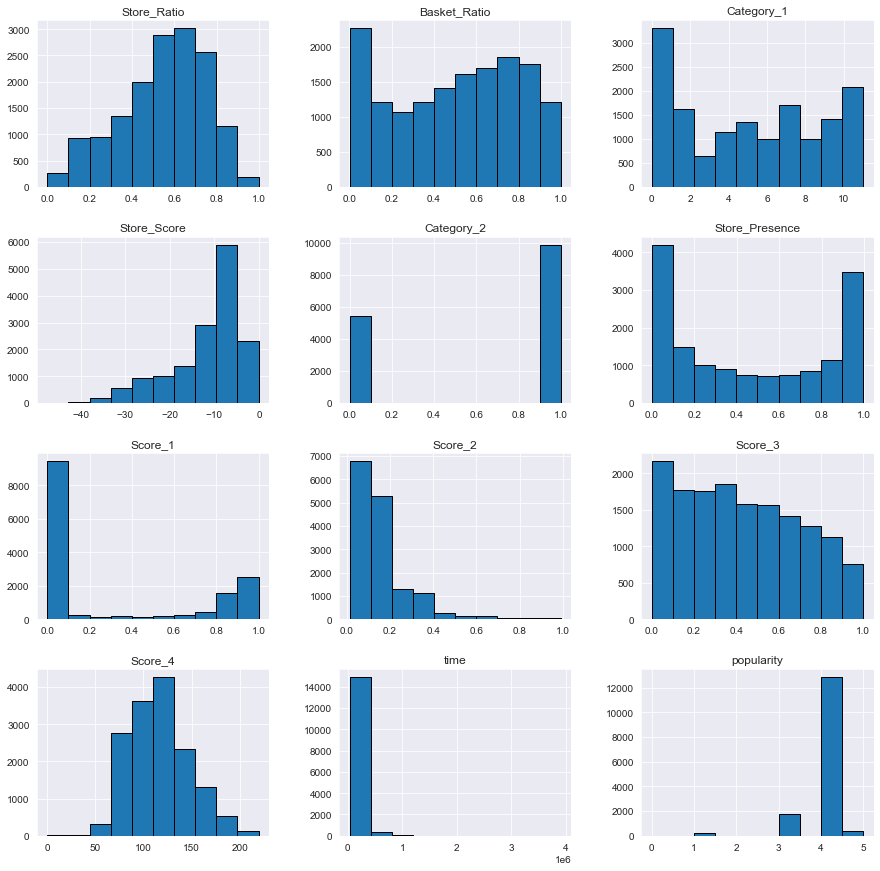

In [10]:
df.hist(edgecolor = "black" , figsize = (15 , 15));

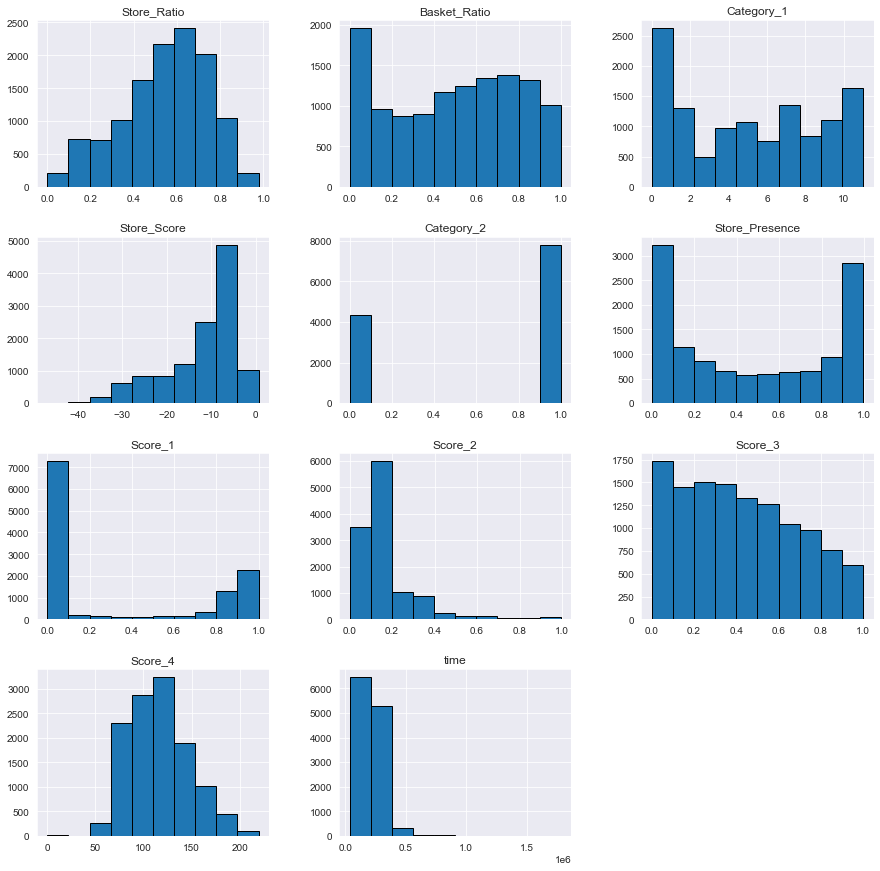

In [11]:
tt.hist(edgecolor = "black" , figsize = (15 , 15));

In [12]:
df = pd.get_dummies(df , columns = ["Category_1"])
tt = pd.get_dummies(tt , columns = ["Category_1"])

In [13]:
df.head()

Store_Ratio  Basket_Ratio  Store_Score  Category_2  Store_Presence  \
0        0.407       0.00380      -35.865           1          0.9920   
1        0.234       0.10500      -19.884           1          0.9440   
2        0.668       0.72600       -7.512           1          0.0387   
3        0.184       0.00561      -34.357           1          0.8490   
4        0.231       0.13100      -22.842           1          0.9370   

   Score_1  Score_2  Score_3  Score_4    time  ...  Category_1_2  \
0    0.944   0.0988   0.1100  113.911  189125  ...             1   
1    0.900   0.1290   0.0382   76.332  186513  ...             0   
2    0.000   0.1340   0.4530  124.075  172143  ...             0   
3    0.931   0.1110   0.0641   79.037  184000  ...             0   
4    0.000   0.1090   0.0677  109.560  186507  ...             0   

   Category_1_3  Category_1_4  Category_1_5  Category_1_6  Category_1_7  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             1             0             0             0   
4             0             0             0             1             0   

   Category_1_8  Category_1_9  Category_1_10  Category_1_11  
0             0             0              0              0  
1             0             0              0              0  
2             0             1              0              0  
3             0             0              0              0  
4             0             0              0              0  

[5 rows x 23 columns]

In [14]:
df["Score_mean"] = (df["Score_1"] + df["Score_2"] + df["Score_3"] ) / 3
tt["Score_mean"] = (tt["Score_1"] + tt["Score_2"] + tt["Score_3"] ) / 3

In [15]:
tt.isna().sum()

Store_Ratio       0
Basket_Ratio      0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
Category_1_0      0
Category_1_1      0
Category_1_2      0
Category_1_3      0
Category_1_4      0
Category_1_5      0
Category_1_6      0
Category_1_7      0
Category_1_8      0
Category_1_9      0
Category_1_10     0
Category_1_11     0
Score_mean        0
dtype: int64

<AxesSubplot:>

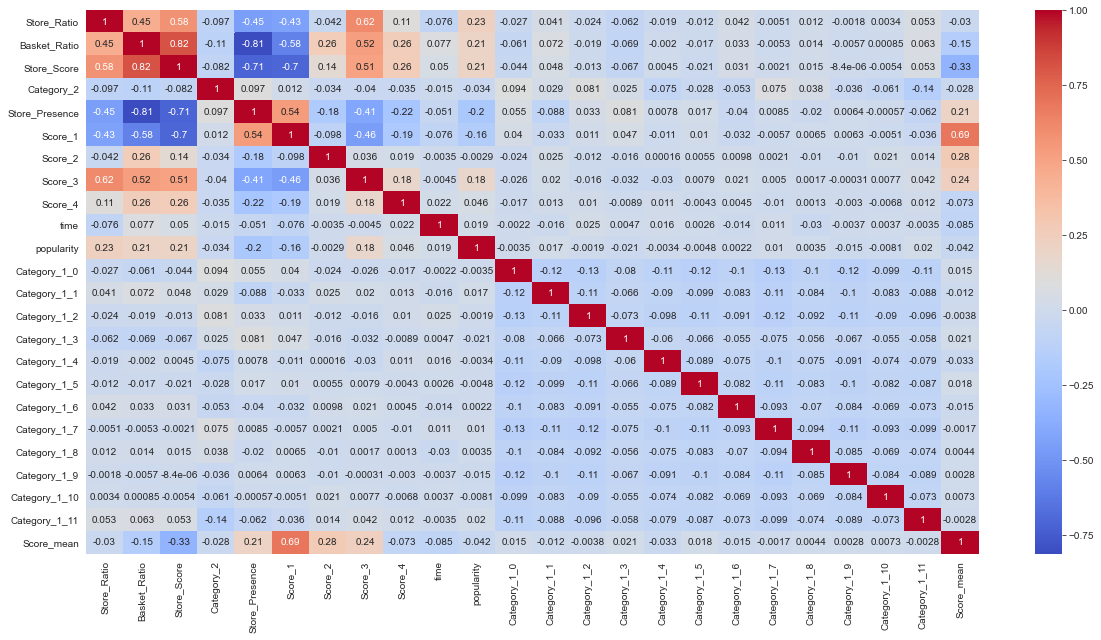

In [16]:
plt.figure(figsize = (20 , 10))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [17]:
ints = ["Store_Ratio" , "Basket_Ratio" , "Store_Score" , "Store_Presence" , "Score_1" ,
        "Score_2" , "Score_3" , "Score_4" , "time" , "Score_mean"]

In [18]:
skew = df.skew()
skew

Store_Ratio      -0.475456
Basket_Ratio     -0.173243
Store_Score      -1.238870
Category_2       -0.611536
Store_Presence    0.160311
Score_1           0.718696
Score_2           2.792849
Score_3           0.226977
Score_4           0.370105
time              8.803099
popularity       -3.115470
Category_1_0      2.258659
Category_1_1      2.849839
Category_1_2      2.552449
Category_1_3      4.542718
Category_1_4      3.237108
Category_1_5      2.889025
Category_1_6      3.539300
Category_1_7      2.459745
Category_1_8      3.498099
Category_1_9      2.807681
Category_1_10     3.563662
Category_1_11     3.320478
Score_mean        0.388238
dtype: float64

time with skewness of     8.80309948945292


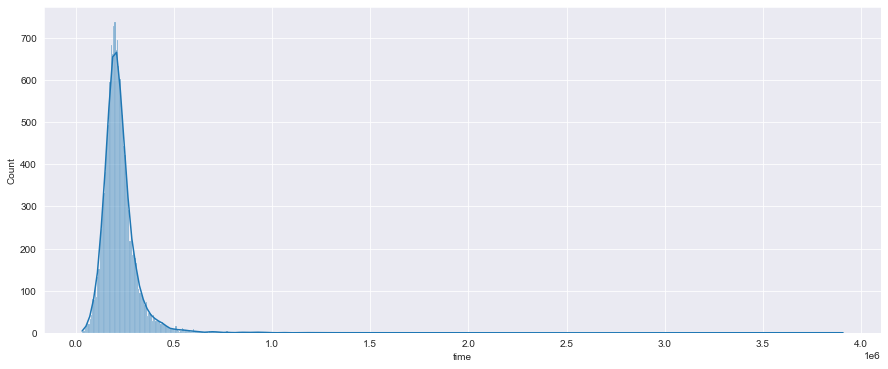

Wall time: 4.98 s


In [19]:
%%time

for i in range(len(skew)):
    if skew[i] > 3 or skew[i] < -3 :
        if skew.index[i] in ints:
            print(f"{skew.index[i]} with skewness of {skew[i] : >{20}}")
            plt.figure(figsize = (15 , 6))
            sns.histplot(data = df , x = df.columns[i] , kde = True)
            plt.show()

In [20]:
kurtosis = df.kurtosis()
kurtosis

Store_Ratio        -0.469811
Basket_Ratio       -1.217851
Store_Score         0.823457
Category_2         -1.626236
Store_Presence     -1.592255
Score_1            -1.375409
Score_2             9.566790
Score_3            -1.086855
Score_4            -0.206692
time              224.516607
popularity         14.336459
Category_1_0        3.101945
Category_1_1        6.122381
Category_1_2        4.515585
Category_1_3       18.638723
Category_1_4        8.479980
Category_1_5        6.347297
Category_1_6       10.528021
Category_1_7        4.050875
Category_1_8       10.238035
Category_1_9        5.883841
Category_1_10      10.701085
Category_1_11       9.026756
Score_mean         -0.029222
dtype: float64

time with kurtosis of   224.51660651381897


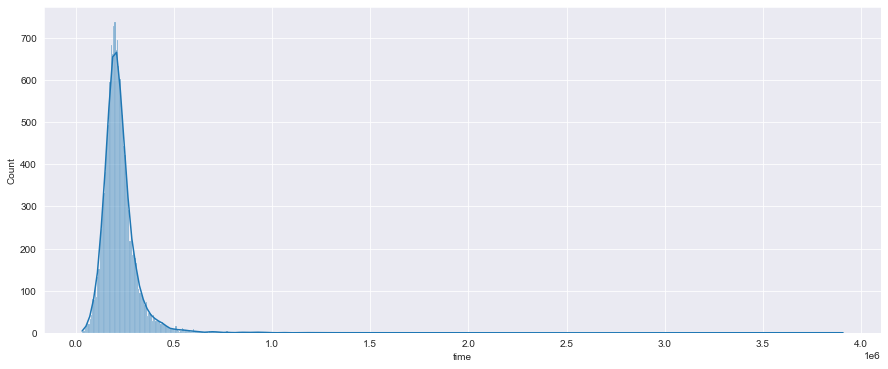

Wall time: 3.38 s


In [21]:
%%time

for i in range(len(kurtosis)):
    if kurtosis[i] > 10 or kurtosis[i] < -10:
        if kurtosis.index[i] in ints:
            print(f"{kurtosis.index[i]} with kurtosis of {kurtosis[i] : >{20}}")
            plt.figure(figsize = (15 , 6))
            sns.histplot(data = df , x = df.columns[i] , kde = True)
            plt.show()

<AxesSubplot:xlabel='time'>

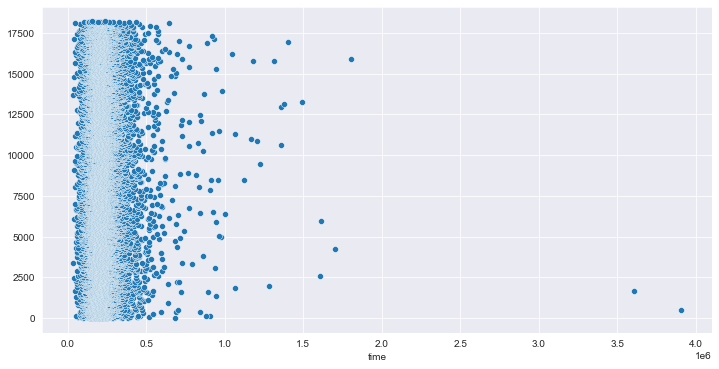

In [22]:
plt.figure(figsize = (12 , 6))
sns.scatterplot(x = df["time"] , y = df.index)

In [23]:
df["time"].loc[df["time"] > np.percentile(df["time"] , [99])[0] * 3] = np.percentile(df["time"] , [99])[0]

In [24]:
for i in ints:
    if i != "Store_Score":
        df[i] = np.log(df[i] + 1)
        tt[i] = np.log(tt[i] + 1)    

In [25]:
tt.isna().sum()

Store_Ratio       0
Basket_Ratio      0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
Category_1_0      0
Category_1_1      0
Category_1_2      0
Category_1_3      0
Category_1_4      0
Category_1_5      0
Category_1_6      0
Category_1_7      0
Category_1_8      0
Category_1_9      0
Category_1_10     0
Category_1_11     0
Score_mean        0
dtype: int64

In [26]:
skew = df.skew()
skew

Store_Ratio      -0.745764
Basket_Ratio     -0.401787
Store_Score      -1.238870
Category_2       -0.611536
Store_Presence    0.009600
Score_1           0.674936
Score_2           2.298328
Score_3          -0.016951
Score_4          -3.497236
time              0.098332
popularity       -3.115470
Category_1_0      2.258659
Category_1_1      2.849839
Category_1_2      2.552449
Category_1_3      4.542718
Category_1_4      3.237108
Category_1_5      2.889025
Category_1_6      3.539300
Category_1_7      2.459745
Category_1_8      3.498099
Category_1_9      2.807681
Category_1_10     3.563662
Category_1_11     3.320478
Score_mean        0.139900
dtype: float64

In [27]:
X = df.drop(["popularity"] , axis = 1)
y = df["popularity"]

In [28]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(12228, 3057, 12228, 3057)

In [29]:
y_train.value_counts()

4    10281
3     1417
5      311
1      206
0       13
Name: popularity, dtype: int64

In [30]:
ints

['Store_Ratio',
 'Basket_Ratio',
 'Store_Score',
 'Store_Presence',
 'Score_1',
 'Score_2',
 'Score_3',
 'Score_4',
 'time',
 'Score_mean']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [33]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

4    10281
3     1417
5      311
1      206
0       13
Name: popularity, dtype: int64

In [34]:
sm = SMOTE(random_state = 42)
X_train_1, y_train_1 = sm.fit_resample(X_train , y_train.ravel())

In [35]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report , log_loss
from sklearn.model_selection import cross_val_score

In [36]:
models = []
models.append(("XGBClassifier", XGBClassifier(objective = 'multi:softprob' , random_state = 42 , eval_metric='mlogloss')))
models.append(("CatBoostClassifier", CatBoostClassifier(random_state = 42 , verbose = 0)))
models.append(("RandomForest", RandomForestClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Extra Tree Classifier", ExtraTreesClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Bagging Classifier", BaggingClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Gradient Boosting Classifier" , GradientBoostingClassifier(random_state = 42)))
models.append(("LightGBM" , LGBMClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Logistic Regression", LogisticRegression(random_state = 42 , solver = "saga")))
models.append(("KNeigbors", KNeighborsClassifier()))

In [37]:
def evaluation_metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 5 , scoring = "f1_weighted")
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    f1 = 100 * (f1_score(y_test , preds , average = "weighted"))
    pred = model[1].predict_proba(X_test)
    score = log_loss(y_test , pred)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (12 , 8))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")
    
    print(f"F1 Score : {f1}")
    print("\n")
    
    print(f"Evaluation Score : {score}")
    print("\n")

    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(f1)
    sam.append(score)
    
    return sam , mod

In [38]:
tt.isna().sum()

Store_Ratio       0
Basket_Ratio      0
Store_Score       0
Category_2        0
Store_Presence    0
Score_1           0
Score_2           0
Score_3           0
Score_4           0
time              0
Category_1_0      0
Category_1_1      0
Category_1_2      0
Category_1_3      0
Category_1_4      0
Category_1_5      0
Category_1_6      0
Category_1_7      0
Category_1_8      0
Category_1_9      0
Category_1_10     0
Category_1_11     0
Score_mean        0
dtype: int64



XGBClassifier


Confusion matrix : 



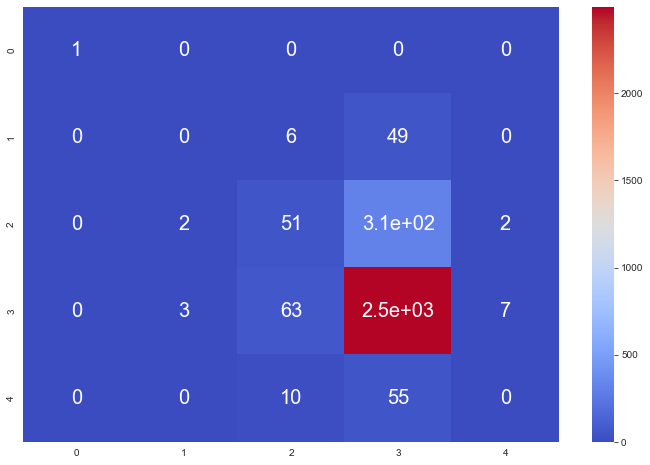



Training score : 0.9671


Test Score : 0.8335


K-fold accuracy : 0.7903


Standard Deviation of Accuracies in k-fold : 0.0057


Classification report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        55
           3       0.39      0.14      0.21       367
           4       0.86      0.97      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.83      3057
   macro avg       0.45      0.42      0.42      3057
weighted avg       0.77      0.83      0.79      3057



F1 Score : 79.03567830554884


Evaluation Score : 0.501265477633043







CatBoostClassifier


Confusion matrix : 



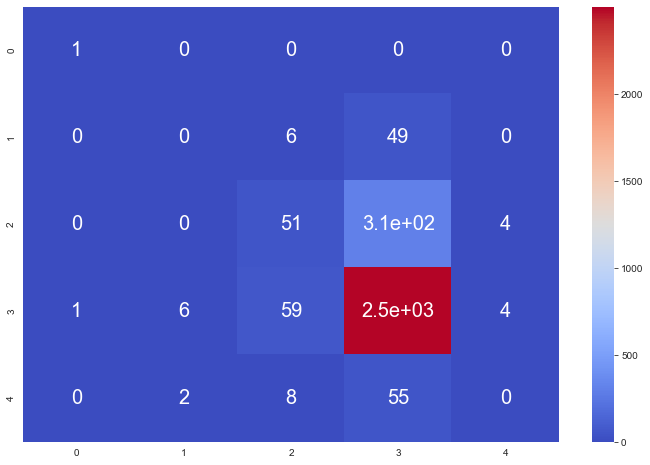



Training score : 0.9338


Test Score : 0.8345


K-fold accuracy : 0.7900


Standard Deviation of Accuracies in k-fold : 0.0038


Classification report : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00        55
           3       0.41      0.14      0.21       367
           4       0.86      0.97      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.83      3057
   macro avg       0.35      0.42      0.36      3057
weighted avg       0.77      0.83      0.79      3057



F1 Score : 79.10495591688172


Evaluation Score : 0.48456114585161336







RandomForest


Confusion matrix : 



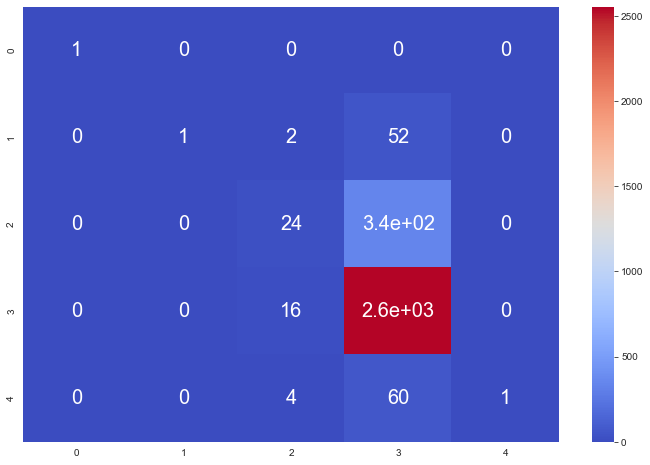



Training score : 1.0000


Test Score : 0.8440


K-fold accuracy : 0.7812


Standard Deviation of Accuracies in k-fold : 0.0035


Classification report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.02      0.04        55
           3       0.52      0.07      0.12       367
           4       0.85      0.99      0.92      2569
           5       1.00      0.02      0.03        65

    accuracy                           0.84      3057
   macro avg       0.87      0.42      0.42      3057
weighted avg       0.82      0.84      0.78      3057



F1 Score : 78.49608735242577


Evaluation Score : 0.6263869480755357







Extra Tree Classifier


Confusion matrix : 



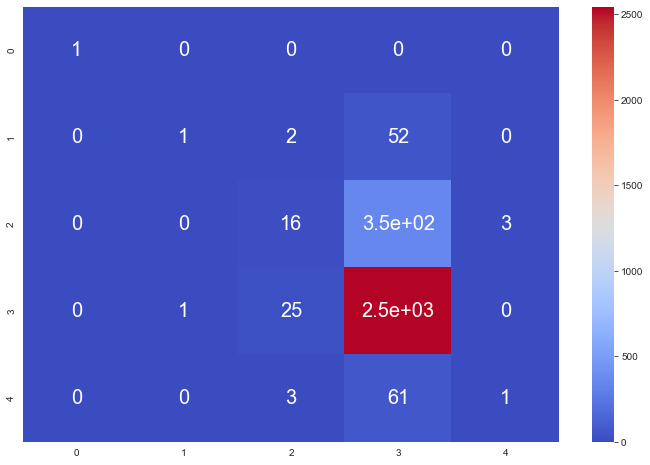



Training score : 1.0000


Test Score : 0.8381


K-fold accuracy : 0.7835


Standard Deviation of Accuracies in k-fold : 0.0031


Classification report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.02      0.04        55
           3       0.35      0.04      0.08       367
           4       0.85      0.99      0.91      2569
           5       0.25      0.02      0.03        65

    accuracy                           0.84      3057
   macro avg       0.59      0.41      0.41      3057
weighted avg       0.77      0.84      0.78      3057



F1 Score : 77.78070290748164


Evaluation Score : 0.5840530671011086







Bagging Classifier


Confusion matrix : 



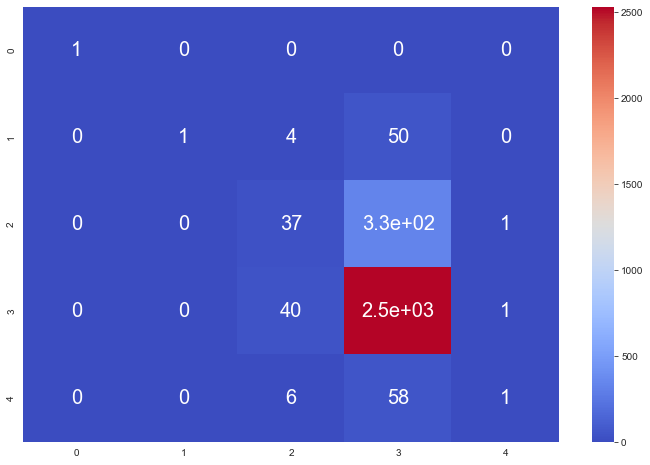



Training score : 1.0000


Test Score : 0.8400


K-fold accuracy : 0.7859


Standard Deviation of Accuracies in k-fold : 0.0043


Classification report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.02      0.04        55
           3       0.43      0.10      0.16       367
           4       0.85      0.98      0.91      2569
           5       0.33      0.02      0.03        65

    accuracy                           0.84      3057
   macro avg       0.72      0.42      0.43      3057
weighted avg       0.79      0.84      0.79      3057



F1 Score : 78.89426596382717


Evaluation Score : 0.6138878329949399







Gradient Boosting Classifier


Confusion matrix : 



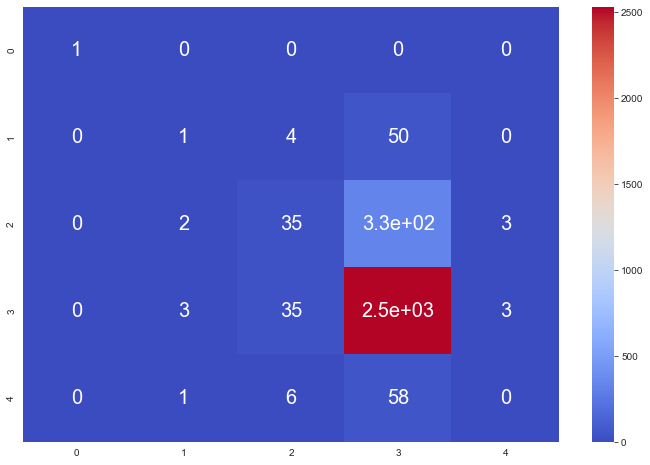



Training score : 0.8685


Test Score : 0.8391


K-fold accuracy : 0.7819


Standard Deviation of Accuracies in k-fold : 0.0016


Classification report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.14      0.02      0.03        55
           3       0.44      0.10      0.16       367
           4       0.85      0.98      0.91      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.84      3057
   macro avg       0.49      0.42      0.42      3057
weighted avg       0.77      0.84      0.79      3057



F1 Score : 78.77648220046581


Evaluation Score : 0.4797756519211048







LightGBM


Confusion matrix : 



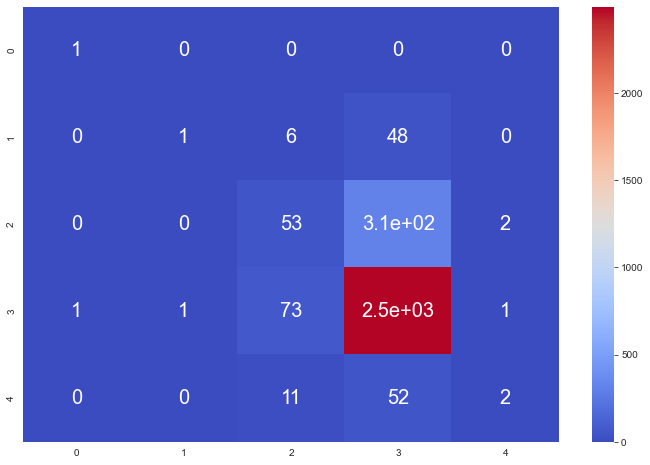



Training score : 0.9860


Test Score : 0.8342


K-fold accuracy : 0.7706


Standard Deviation of Accuracies in k-fold : 0.0161


Classification report : 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.50      0.02      0.04        55
           3       0.37      0.14      0.21       367
           4       0.86      0.97      0.91      2569
           5       0.40      0.03      0.06        65

    accuracy                           0.83      3057
   macro avg       0.53      0.43      0.38      3057
weighted avg       0.78      0.83      0.79      3057



F1 Score : 79.24652242106941


Evaluation Score : 0.5422472366337577







Logistic Regression


Confusion matrix : 



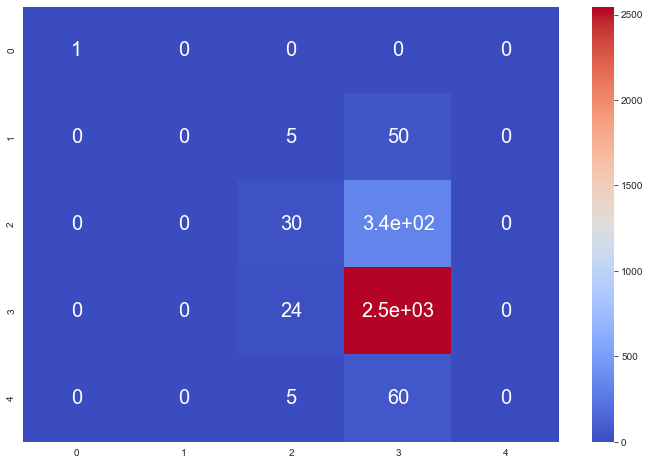



Training score : 0.8414


Test Score : 0.8427


K-fold accuracy : 0.7817


Standard Deviation of Accuracies in k-fold : 0.0033


Classification report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00        55
           3       0.47      0.08      0.14       367
           4       0.85      0.99      0.92      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.84      3057
   macro avg       0.46      0.41      0.41      3057
weighted avg       0.77      0.84      0.79      3057



F1 Score : 78.62296048715808


Evaluation Score : 0.4735686265454572







KNeigbors


Confusion matrix : 



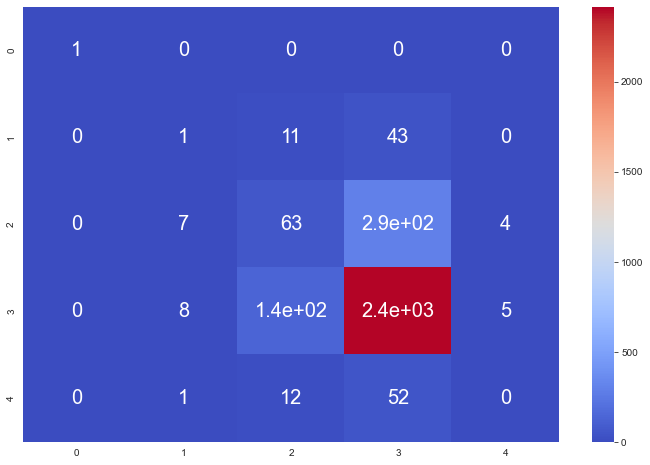



Training score : 0.8591


Test Score : 0.8113


K-fold accuracy : 0.7867


Standard Deviation of Accuracies in k-fold : 0.0039


Classification report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.06      0.02      0.03        55
           3       0.28      0.17      0.21       367
           4       0.86      0.94      0.90      2569
           5       0.00      0.00      0.00        65

    accuracy                           0.81      3057
   macro avg       0.44      0.43      0.43      3057
weighted avg       0.76      0.81      0.78      3057



F1 Score : 78.18713787033874


Evaluation Score : 2.772403073492481





Wall time: 6min 16s


In [44]:
%%time

pre_final = []

for i in models:
    sam = evaluation_metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [45]:
data_pre_final = [x[0] for x in pre_final]

In [46]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score" , "Evaluation_Score"])

me.sort_values(by = ["Evaluation_Score" , "F1 Score" , "K-fold Std" , "K-fold Accuracy" , "Test Score" , "Train Score"] , inplace = True , ascending = [True , False , True , False , False , False])
me = me.reset_index(drop = True)
me

Model  Train Score  Test Score  K-fold Accuracy  \
0           Logistic Regression     0.841430    0.842656         0.781711   
1  Gradient Boosting Classifier     0.868499    0.839058         0.781939   
2            CatBoostClassifier     0.933840    0.834478         0.789967   
3                 XGBClassifier     0.967125    0.833497         0.790298   
4                      LightGBM     0.986016    0.834151         0.770631   
5         Extra Tree Classifier     1.000000    0.838077         0.783522   
6            Bagging Classifier     1.000000    0.840039         0.785927   
7                  RandomForest     1.000000    0.843965         0.781219   
8                     KNeigbors     0.859094    0.811253         0.786710   

   K-fold Std   F1 Score  Evaluation_Score  
0    0.003262  78.622960          0.473569  
1    0.001598  78.776482          0.479776  
2    0.003757  79.104956          0.484561  
3    0.005714  79.035678          0.501265  
4    0.016081  79.246522          0.542247  
5    0.003136  77.780703          0.584053  
6    0.004320  78.894266          0.613888  
7    0.003543  78.496087          0.626387  
8    0.003903  78.187138          2.772403

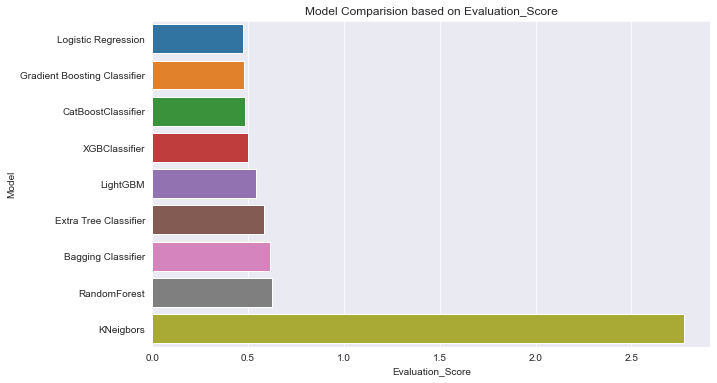

In [47]:
plt.figure(figsize = (10 , 6))
sns.barplot(y = "Model" , x = "Evaluation_Score" , data = me)
plt.title("Model Comparision based on Evaluation_Score");

In [54]:
# %%time

# pre_final_1 = []

# for i in models:
#     sam = evaluation_metrics(i , X_train_1 , y_train_1 , X_test , y_test)
#     pre_final_1.append(sam)

In [41]:
# data_pre_final_1 = [x[0] for x in pre_final_1]

In [42]:
# me_1 = pd.DataFrame(data_pre_final_1 , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score" , "Evaluation_Score"])

# me_1.sort_values(by = ["Evaluation_Score" , "F1 Score" , "K-fold Std" , "K-fold Accuracy" , "Test Score" , "Train Score"] , inplace = True , ascending = [True , False , True , False , False , False])
# me_1 = me_1.reset_index(drop = True)
# me_1

Model  Train Score  Test Score  K-fold Accuracy  \
0  Extra Tree Classifier     1.000000    0.797187         0.965394   
1     CatBoostClassifier     0.960471    0.762839         0.925191   
2          XGBClassifier     0.962533    0.753680         0.914049   
3           RandomForest     1.000000    0.766765         0.951699   

   K-fold Std   F1 Score  Evaluation_Score  
0    0.008069  78.627155          0.611023  
1    0.014158  77.234815          0.618906  
2    0.014722  76.544029          0.637637  
3    0.001926  78.237087          0.650905

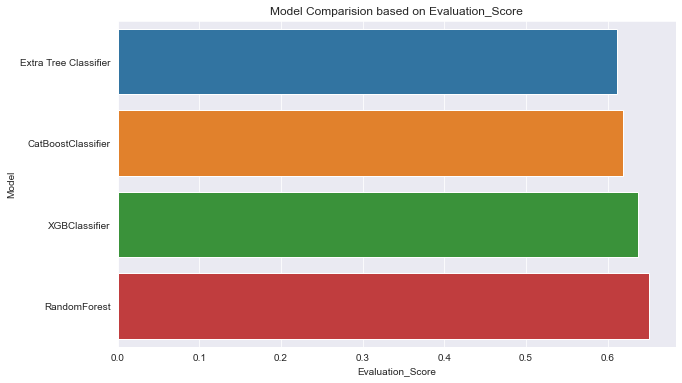

In [48]:
plt.figure(figsize = (10 , 6))
sns.barplot(y = "Model" , x = "Evaluation_Score" , data = me_1)
plt.title("Model Comparision based on Evaluation_Score");

In [195]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    temp = pd.DataFrame(list(zip(features , X_train.columns)) , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)
    plt.figure(figsize = (15 , 15))
    sns.set(font_scale = 1)
    sns.barplot(data = temp , y = "Feartures" , x = "Feature Importances")
    plt.show()
    return temp

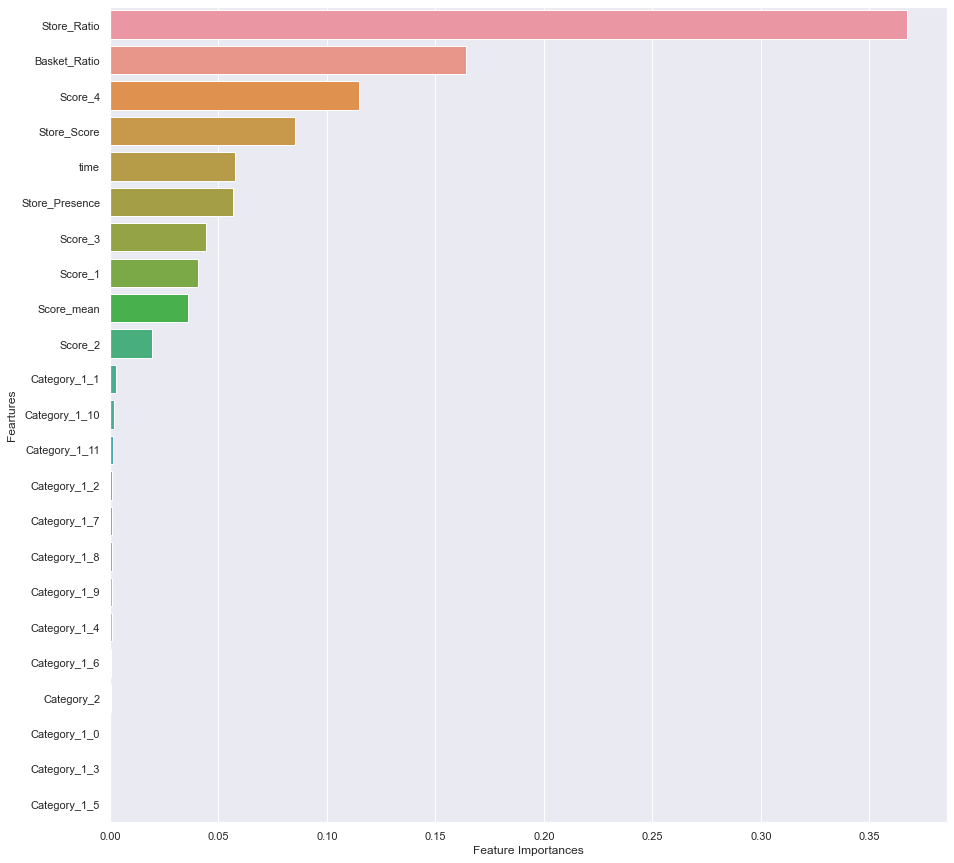

In [196]:
grad_df = feature_importance(grad , X_train , y_train)

In [197]:
grad_df

Feature Importances       Feartures
0              0.367345     Store_Ratio
1              0.164113    Basket_Ratio
2              0.114807         Score_4
3              0.085452     Store_Score
4              0.057559            time
5              0.056706  Store_Presence
6              0.044217         Score_3
7              0.040575         Score_1
8              0.035988      Score_mean
9              0.019410         Score_2
10             0.002907    Category_1_1
11             0.002034   Category_1_10
12             0.001680   Category_1_11
13             0.001203    Category_1_2
14             0.001133    Category_1_7
15             0.001075    Category_1_8
16             0.000955    Category_1_9
17             0.000923    Category_1_4
18             0.000768    Category_1_6
19             0.000645      Category_2
20             0.000263    Category_1_0
21             0.000241    Category_1_3
22             0.000001    Category_1_5

In [201]:
grad = pre_final[5][1]
grad

GradientBoostingClassifier(random_state=42)

In [193]:
final_grad = pd.DataFrame(grad.predict_proba(tt) , columns = [0 , 1 , 3 , 4 , 5])
final_grad

0         1         3         4         5
0      2.239691e-07  0.023928  0.502516  0.435049  0.038507
1      1.683551e-07  0.003779  0.028275  0.960055  0.007890
2      2.537977e-07  0.004152  0.063617  0.915876  0.016355
3      2.039264e-07  0.006404  0.040274  0.943352  0.009971
4      9.739508e-08  0.002059  0.014429  0.978948  0.004564
...             ...       ...       ...       ...       ...
12135  6.491018e-07  0.063272  0.254293  0.620515  0.061919
12136  8.607771e-08  0.001845  0.012167  0.983787  0.002201
12137  1.510883e-07  0.003484  0.026712  0.964579  0.005225
12138  1.224329e-07  0.002860  0.023793  0.969055  0.004292
12139  3.597645e-07  0.022416  0.429089  0.511225  0.037269

[12140 rows x 5 columns]

In [194]:
final_grad.to_csv("Gradient_1.csv" , index = False)

In [50]:
linear = pre_final[-2][1]
linear

LogisticRegression(random_state=42, solver='saga')

In [52]:
final_linear = pd.DataFrame(linear.predict_proba(tt) , columns = [0 , 1 , 3 , 4 , 5])
final_linear

0         1         3         4         5
0      0.000130  0.065297  0.102647  0.759827  0.072099
1      0.000026  0.004092  0.051560  0.937339  0.006983
2      0.000022  0.005119  0.089345  0.890071  0.015443
3      0.000084  0.005173  0.047585  0.939090  0.008068
4      0.000061  0.000969  0.013500  0.981598  0.003872
...         ...       ...       ...       ...       ...
12135  0.000128  0.071040  0.291663  0.535404  0.101765
12136  0.000067  0.001307  0.011264  0.984877  0.002485
12137  0.000130  0.005011  0.042682  0.943369  0.008808
12138  0.000096  0.003512  0.026783  0.964920  0.004689
12139  0.000060  0.033781  0.280699  0.654156  0.031304

[12140 rows x 5 columns]

In [53]:
final_linear.to_csv("Linear_1.csv" , index = False)